# Calc Return

For a given stock, the return `ret(t)` is connected to its close price `p(t)` by

         
$\large ret(t) = \frac{p(t) - p(t-1)}{p(t-1)} $


The close price for Apple stock for all business days in 2008 is loaded for you
from the data file `aapl_2008_close_values.csv`.

1. Use these values to compute the corresponding daily return for every business day of that year (except the first one).

2. Plot these returns, converted to percentages, over the course of the year. On the same plot, draw a red line at 0.

**Note**: a for loop is neither necessary nor recommended for this calculation

## Bonus

3. There is some blank space in the plot made in question 2 because by default, matplotlib displays plots with a range along the x axis that is larger than the highest x coordinate. Use IPython to learn about matplotlib's `plt.xlim` function and make the limits of your plot tighter.

In [18]:
%matplotlib inline
from numpy import arange, loadtxt, zeros, diff
import matplotlib.pyplot as plt
import numpy as np

0. The close price for Apple stock for all business days in 2008 is loaded for you from the data file `aapl_2008_close_values.csv.`

In [2]:
prices = loadtxt("aapl_2008_close_values.csv", usecols=[1], delimiter=",")

print("Prices for AAPL stock in 2008:")
print(prices)

Prices for AAPL stock in 2008:
[194.84 194.93 180.05 177.64 171.25 179.4  178.02 172.69 178.78 169.04
 159.64 160.89 161.36 155.64 139.07 135.6  130.01 130.01 131.54 132.18
 135.36 133.75 131.65 129.36 122.   121.24 125.48 129.45 124.86 129.4
 127.46 124.63 122.18 123.82 121.54 119.46 119.74 119.15 122.96 129.91
 125.02 121.73 124.62 124.49 120.93 122.25 119.69 127.35 126.03 127.94
 126.61 126.73 132.82 129.67 133.27 139.53 140.98 145.06 140.25 143.01
 143.5  149.53 147.49 151.61 153.08 155.89 152.84 151.44 154.55 147.14
 147.78 148.38 153.7  154.49 161.04 168.16 160.2  162.89 168.94 169.73
 172.24 175.05 173.95 180.   180.94 184.73 186.66 182.59 185.06 183.45
 188.16 189.96 186.26 189.73 187.62 183.6  185.9  178.19 177.05 181.17
 186.43 187.01 186.69 188.75 186.1  185.37 185.19 189.43 185.64 181.61
 185.64 180.81 173.26 172.37 176.84 181.43 178.75 180.9  175.27 173.16
 173.25 177.39 168.26 170.09 167.44 174.68 168.18 170.12 175.16 179.55
 174.25 176.63 172.58 173.88 169.64 172.81 171.

1. Use these values (`prices`) to compute the corresponding daily return for every business day of that year (except the first one).

In [3]:
prices[1:]
# Your code goes here

array([194.93, 180.05, 177.64, 171.25, 179.4 , 178.02, 172.69, 178.78,
       169.04, 159.64, 160.89, 161.36, 155.64, 139.07, 135.6 , 130.01,
       130.01, 131.54, 132.18, 135.36, 133.75, 131.65, 129.36, 122.  ,
       121.24, 125.48, 129.45, 124.86, 129.4 , 127.46, 124.63, 122.18,
       123.82, 121.54, 119.46, 119.74, 119.15, 122.96, 129.91, 125.02,
       121.73, 124.62, 124.49, 120.93, 122.25, 119.69, 127.35, 126.03,
       127.94, 126.61, 126.73, 132.82, 129.67, 133.27, 139.53, 140.98,
       145.06, 140.25, 143.01, 143.5 , 149.53, 147.49, 151.61, 153.08,
       155.89, 152.84, 151.44, 154.55, 147.14, 147.78, 148.38, 153.7 ,
       154.49, 161.04, 168.16, 160.2 , 162.89, 168.94, 169.73, 172.24,
       175.05, 173.95, 180.  , 180.94, 184.73, 186.66, 182.59, 185.06,
       183.45, 188.16, 189.96, 186.26, 189.73, 187.62, 183.6 , 185.9 ,
       178.19, 177.05, 181.17, 186.43, 187.01, 186.69, 188.75, 186.1 ,
       185.37, 185.19, 189.43, 185.64, 181.61, 185.64, 180.81, 173.26,
      

In [5]:
prices[:-1]

array([194.84, 194.93, 180.05, 177.64, 171.25, 179.4 , 178.02, 172.69,
       178.78, 169.04, 159.64, 160.89, 161.36, 155.64, 139.07, 135.6 ,
       130.01, 130.01, 131.54, 132.18, 135.36, 133.75, 131.65, 129.36,
       122.  , 121.24, 125.48, 129.45, 124.86, 129.4 , 127.46, 124.63,
       122.18, 123.82, 121.54, 119.46, 119.74, 119.15, 122.96, 129.91,
       125.02, 121.73, 124.62, 124.49, 120.93, 122.25, 119.69, 127.35,
       126.03, 127.94, 126.61, 126.73, 132.82, 129.67, 133.27, 139.53,
       140.98, 145.06, 140.25, 143.01, 143.5 , 149.53, 147.49, 151.61,
       153.08, 155.89, 152.84, 151.44, 154.55, 147.14, 147.78, 148.38,
       153.7 , 154.49, 161.04, 168.16, 160.2 , 162.89, 168.94, 169.73,
       172.24, 175.05, 173.95, 180.  , 180.94, 184.73, 186.66, 182.59,
       185.06, 183.45, 188.16, 189.96, 186.26, 189.73, 187.62, 183.6 ,
       185.9 , 178.19, 177.05, 181.17, 186.43, 187.01, 186.69, 188.75,
       186.1 , 185.37, 185.19, 189.43, 185.64, 181.61, 185.64, 180.81,
      

In [7]:
diffs = prices[1:] - prices[:-1]
returns = diffs/prices[:-1]
returns

array([ 4.61917471e-04, -7.63350946e-02, -1.33851708e-02, -3.59716280e-02,
        4.75912409e-02, -7.69230769e-03, -2.99404561e-02,  3.52655047e-02,
       -5.44803669e-02, -5.56081401e-02,  7.83011776e-03,  2.92125054e-03,
       -3.54486862e-02, -1.06463634e-01, -2.49514633e-02, -4.12241888e-02,
        0.00000000e+00,  1.17683255e-02,  4.86544017e-03,  2.40581026e-02,
       -1.18942080e-02, -1.57009346e-02, -1.73946069e-02, -5.68954855e-02,
       -6.22950820e-03,  3.49719565e-02,  3.16385081e-02, -3.54577057e-02,
        3.63607240e-02, -1.49922720e-02, -2.22030441e-02, -1.96581882e-02,
        1.34228188e-02, -1.84138265e-02, -1.71137074e-02,  2.34388080e-03,
       -4.92734258e-03,  3.19765002e-02,  5.65224463e-02, -3.76414441e-02,
       -2.63157895e-02,  2.37410663e-02, -1.04317124e-03, -2.85966744e-02,
        1.09154056e-02, -2.09406953e-02,  6.39986632e-02, -1.03651355e-02,
        1.51551218e-02, -1.03954979e-02,  9.47792433e-04,  4.80549199e-02,
       -2.37163078e-02,  

2. Plot these returns, converted to percentages, over the course of the year. On the same plot, draw a red line at 0.
  - The matplotlib code for plotting has been provided for you.

In [13]:
days = arange(len(returns))
zero_line = zeros(len(returns))
zero_line

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
# Create an array of zeros that corresponds to the length of daily returns
days = # Your code goes here
zero_line = # Your code goes here

In [ ]:
# Plot the zero line acrros days
plt.plot(days, zero_line, 'r-')

# Plot the daily returns as a percentage
plt.plot(_____, _____, 'b-')

# Specify a plot title
plt.title('Daily return of AAPL stock in 2008 (%)');

## Bonus
3. There is some blank space in the plot made in question 2 because by default, `matplotlib` displays plots with a range along the x axis that is larger than the highest x coordinate. Use IPython to learn about `matplotlib`'s `plt.xlim` function and make the limits of your plot tighter.

(-12.55, 252.0)

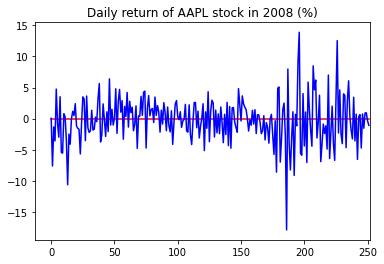

In [16]:
# Plot the daily returns with xlim
plt.plot(days, zero_line, 'r-', days, returns * 100 , 'b-')
plt.title('Daily return of AAPL stock in 2008 (%)');
plt.xlim(xmax = len(returns))

In [19]:
a = np.arange(0,80,10)

In [20]:
indices = [1,2,5]

In [21]:
y = a[indices]
y

array([10, 20, 50])

In [23]:
a = np.arange(0, 80, 10)
a

array([ 0, 10, 20, 30, 40, 50, 60, 70])

In [24]:
a[[1,2,-3]]

array([10, 20, 50])

In [25]:
a[[1,2,5]]

array([10, 20, 50])

In [26]:
a[[1,2,5,5,5,5]]

array([10, 20, 50, 50, 50, 50])

In [29]:
a[[1,2,5]] = 999

In [30]:
a

array([  0, 999, 999,  30,  40, 999,  60,  70])